In [2]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

# PART 1

In [3]:
df= pd.read_csv('house_data.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:             
        if df[column].nunique() < 150:      
                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)      
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  ------------
MSSubClass     Id
MSZoning       LotArea
LotFrontage    MasVnrArea
Street         BsmtFinSF1
Alley          BsmtUnfSF
LotShape       TotalBsmtSF
LandContour    1stFlrSF
Utilities      2ndFlrSF
LotConfig      GrLivArea
LandSlope      GarageArea
Neighborhood   WoodDeckSF
Condition1     OpenPorchSF
Condition2     SalePrice
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
BsmtFinSF2
Heating
HeatingQC
CentralAir
Electrical
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageQual
GarageCond
PavedDrive
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition


In [9]:
Columns=['SalePrice','GrLivArea','LotArea','GarageArea','GarageCars','FullBath','YearBuilt','YrSold']

In [12]:
df1=df[['SalePrice','GrLivArea','LotArea','GarageArea','GarageCars','FullBath','YearBuilt','YrSold']]
df1

,SalePrice,GrLivArea,LotArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold
0,208500,1710,8450,548,2,2,2003,2008
1,181500,1262,9600,460,2,2,1976,2007
2,223500,1786,11250,608,2,2,2001,2008
3,140000,1717,9550,642,3,1,1915,2006
4,250000,2198,14260,836,3,2,2000,2008
...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,460,2,2,1999,2007
1456,210000,2073,13175,500,2,2,1978,2010
1457,266500,2340,9042,252,1,2,1941,2010
1458,142125,1078,9717,240,1,1,1950,2010


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   SalePrice   1460 non-null   int64
 1   GrLivArea   1460 non-null   int64
 2   LotArea     1460 non-null   int64
 3   GarageArea  1460 non-null   int64
 4   GarageCars  1460 non-null   int64
 5   FullBath    1460 non-null   int64
 6   YearBuilt   1460 non-null   int64
 7   YrSold      1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


In [22]:
# TASK 2
df2= df1
df2['AgeWhenSold']=df2.YrSold - df2.YearBuilt
df2

,SalePrice,GrLivArea,LotArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold,AgeWhenSold
0,208500,1710,8450,548,2,2,2003,2008,5
1,181500,1262,9600,460,2,2,1976,2007,31
2,223500,1786,11250,608,2,2,2001,2008,7
3,140000,1717,9550,642,3,1,1915,2006,91
4,250000,2198,14260,836,3,2,2000,2008,8
...,...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,460,2,2,1999,2007,8
1456,210000,2073,13175,500,2,2,1978,2010,32
1457,266500,2340,9042,252,1,2,1941,2010,69
1458,142125,1078,9717,240,1,1,1950,2010,60


In [23]:
df2= df2[(df2.GrLivArea < 2600) & (df2.LotArea <  40000)]
df2

,SalePrice,GrLivArea,LotArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold,AgeWhenSold
0,208500,1710,8450,548,2,2,2003,2008,5
1,181500,1262,9600,460,2,2,1976,2007,31
2,223500,1786,11250,608,2,2,2001,2008,7
3,140000,1717,9550,642,3,1,1915,2006,91
4,250000,2198,14260,836,3,2,2000,2008,8
...,...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,460,2,2,1999,2007,8
1456,210000,2073,13175,500,2,2,1978,2010,32
1457,266500,2340,9042,252,1,2,1941,2010,69
1458,142125,1078,9717,240,1,1,1950,2010,60


# PART 2

In [38]:
df3 = df2[['SalePrice','GrLivArea']]

In [39]:
# TASK 1
df_train, df_test = train_test_split(df3, train_size=0.8, random_state=20)
X_train = df_train.drop(columns='SalePrice', axis =1)
y_train = df_train['SalePrice']
X_test = df_test.drop(columns='SalePrice', axis =1)
y_test = df_test['SalePrice']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1116, 1), (1116,), (280, 1), (280,))

In [40]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train, y_train)
Prediction= Model.predict(X_test)
Prediction

array([148412.43072343, 238443.87908914, 210592.42383932, 116458.82314999,
       159531.42254798, 136321.87650646, 113652.08734962, 139020.66092989,
       145821.59767694, 173457.15017289, 123151.80852011, 202496.07056902,
       134702.6058524 , 169786.80335702, 242330.12865889, 288209.46385724,
       114839.55249593, 178314.96213507, 213399.15963969, 221927.31841774,
       141935.3481072 , 189326.00258267, 272340.61144746, 195911.03657585,
       116027.01764224, 157480.34638617, 200660.89716109, 158128.05464779,
       119265.55895036, 201956.31368434, 112680.52495719, 116027.01764224,
       105555.73407933, 141395.59122251, 109549.93502601, 130276.59939797,
        84289.31282268, 140855.83433782,  94004.93674704, 180366.03829688,
       101777.43588652, 189433.95395961, 141287.63984557, 197098.50172216,
       159207.56841716, 230995.23408047, 253772.97461424, 134162.84896771,
       158128.05464779, 226785.13037991, 211887.84036257, 163957.42900241,
       151435.06927768, 1

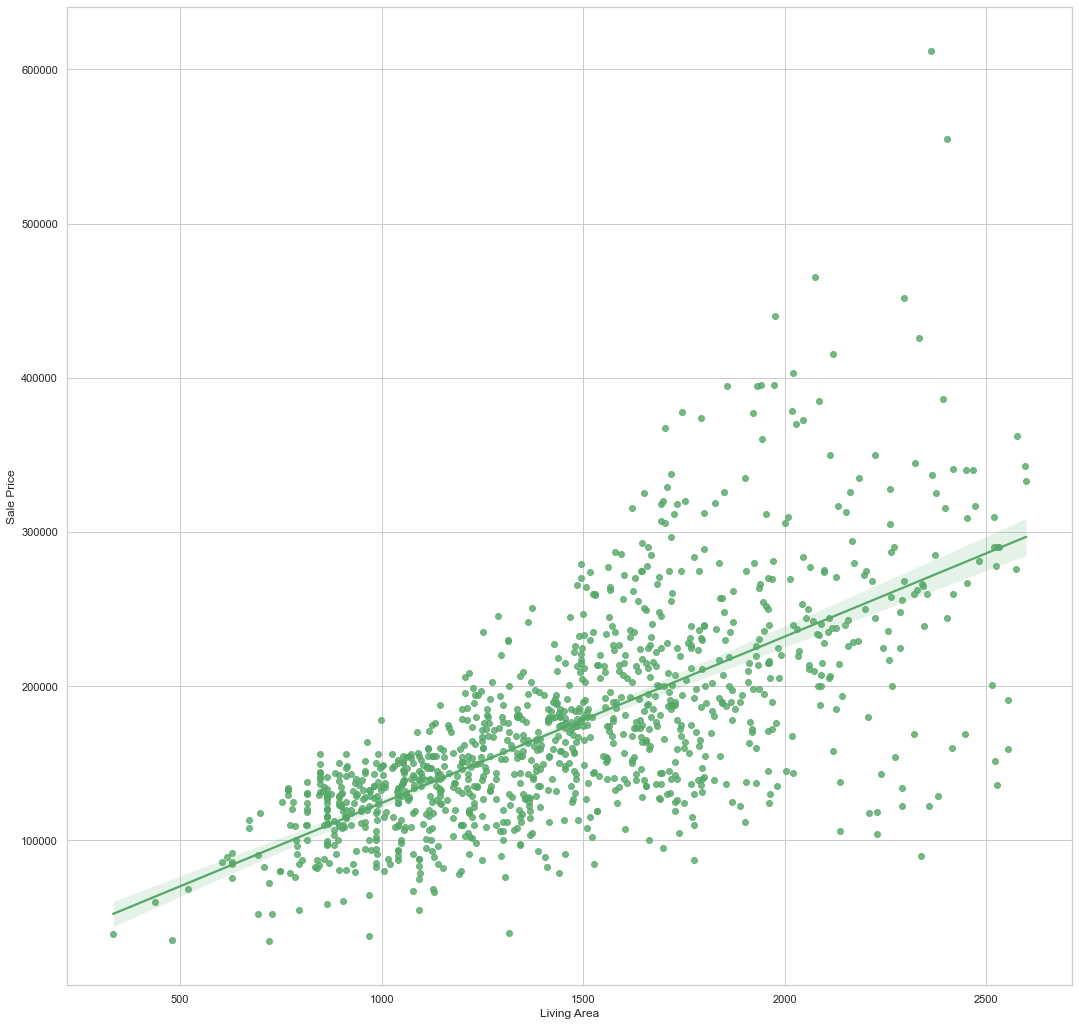

In [61]:
# TASK 3
fig, ax = plt.subplots(figsize = (18, 18))
sns.regplot(x=X_train,y=y_train, color='g')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.show()

In [42]:
df3.corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.677466
GrLivArea,0.677466,1.000000


In [51]:
# TASk 4
import math
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(X_train,y_train)
RMSE=math.sqrt(MSE)
RMSE

185029.98366335998

In [59]:
MSE5= mean_squared_error(Prediction,y_test)
RMSE5=math.sqrt(MSE5)
RMSE5

50194.23908945436

In [48]:
# TASK 5
df_train1, df_test1 = train_test_split(df3, train_size=0.8, random_state=21)
X_train1 = df_train1.drop(columns='SalePrice', axis =1)
y_train1 = df_train1['SalePrice']
X_test1 = df_test1.drop(columns='SalePrice', axis =1)
y_test1 = df_test1['SalePrice']
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((1116, 1), (1116,), (280, 1), (280,))

In [49]:
Model1 = LinearRegression()
Model1.fit(X_train1, y_train1)
Prediction1= Model.predict(X_test1)
Prediction1

array([174968.46945001, 199689.33476865, 204115.34122308, 177559.30249651,
       120776.87822749, 120884.82960442, 222251.17254855, 257011.51592236,
       113436.18459575, 178638.81626588, 195587.18244504, 159639.37392491,
       243841.44793601, 191808.88425223, 192456.59251385, 109549.93502601,
       104368.26893302, 113652.08734962, 193320.20352935, 119913.26721199,
       186411.31540536, 205194.85499245, 170758.36574946, 194075.86316791,
       130060.69664409, 119913.26721199, 162877.91523303, 288425.36661111,
       171729.92814189, 262948.84165391, 162769.9638561 , 161906.3528406 ,
       148412.43072343, 180042.18416606, 117538.33691937, 102964.90103283,
       196126.93932972, 187274.92642086, 289504.88038049, 184036.38511274,
       132003.82142897, 260573.91136129, 175184.37220389, 164173.33175628,
       177775.20525038, 214802.52753987, 186087.46127455, 104368.26893302,
       118186.04518099, 229699.81755722,  84289.31282268, 195047.42556035,
       126390.34982823, 1

In [52]:
MSE1= mean_squared_error(X_train1, y_train1)
RMSE1=math.sqrt(MSE1)
RMSE1

186111.43484840108

In [63]:
MSE2= mean_squared_error(Prediction1,y_test1)
RMSE2=math.sqrt(MSE2)
RMSE2

47793.03531199237

# PART 3

In [64]:
df4= df2[['SalePrice','GrLivArea','LotArea','GarageArea','AgeWhenSold']]

In [65]:
# TASK 1
df_train2, df_test2 = train_test_split(df4, train_size=0.8, random_state=19)
X_train2 = df_train2.drop(columns='SalePrice', axis =1)
y_train2 = df_train2['SalePrice']
X_test2 = df_test2.drop(columns='SalePrice', axis =1)
y_test2 = df_test2['SalePrice']
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((1116, 4), (1116,), (280, 4), (280,))

In [66]:
Model2 = LinearRegression()
Model2.fit(X_train2, y_train2)
Prediction2= Model2.predict(X_test2)
Prediction2

array([104619.0032408 ,  99333.7140051 , 112189.60666948, 209272.30423001,
       232047.60244492, 273186.57246681, 185995.70546874, 216016.06209767,
        54174.32427447, 121797.91632448, 204269.26021206, 123978.10222284,
       288764.98885004, 141709.97330172, 271594.20562657,  72493.76553051,
        73739.7042261 , 153610.08086416, 188616.80377277, 215447.55099507,
       120525.74378797, 191449.64980024, 250100.95573554, 283874.2976894 ,
       182001.88640048, 115639.03174801, 172115.83779331, 190410.88329917,
       119872.83696611, 162044.9258741 ,  74628.54906689, 193140.89126479,
       167174.20793369, 157982.26799734, 221585.3638997 , 241372.07029142,
       108267.24366858, 144810.05515376,  80146.18744645, 122441.47840844,
       140826.06909389, 184114.71366065, 167389.22986548, 198931.50109001,
        85532.41737985, 174167.66008086, 146708.82106347, 203404.40024514,
       195702.56523992, 323790.18989108, 157277.51046977, 234745.01439366,
        78429.78690059, 1

In [68]:
MSE3= mean_squared_error(Prediction2,y_test2)
RMSE3=math.sqrt(MSE3)
RMSE3

41005.89493059852

The performance has improved in comparison to part 2.

In [72]:
# TASK 3
price= Model2.predict([[400,2000,80,40]])
print(price)

[53644.04435932]


In [104]:
df41=df4[((df4.GrLivArea>360)&(df4.GrLivArea<440))|((df4.LotArea>1800)&(df4.LotArea<2200))|((df4.GarageArea<72)&(df4.GarageArea>88))|((df4.AgeWhenSold<36)&(df4.AgeWhenSold>44))]
df41

,SalePrice,GrLivArea,LotArea,GarageArea,AgeWhenSold
180,177000,1525,2117,440,7
227,106000,987,1869,280,38
432,122500,1365,1920,440,36
434,81000,630,1890,0,36
500,113000,1218,1890,264,34
599,151000,1556,1950,452,28
623,168500,1512,2117,440,7
649,84500,630,1936,0,37
915,75000,1092,2001,286,37
1086,83500,1092,1974,286,37


In [109]:
X_test21 = df41.drop(columns='SalePrice', axis=1)
y_test21 = df41['SalePrice']
X_test21

,GrLivArea,LotArea,GarageArea,AgeWhenSold
180,1525,2117,440,7
227,987,1869,280,38
432,1365,1920,440,36
434,630,1890,0,36
500,1218,1890,264,34
599,1556,1950,452,28
623,1512,2117,440,7
649,630,1936,0,37
915,1092,2001,286,37
1086,1092,1974,286,37


In [107]:
Prediction21= Model2.predict(X_test21)
Prediction21

array([187457.67858728, 111318.68100991, 151723.73823645,  66550.98383558,
       129497.85296033, 172659.95331043, 186555.35336119,  65799.52184893,
       120152.89401253, 120102.87961649, 168620.21313719,  40005.37746963,
       146692.08863684, 188279.32586529, 114417.59974489])

In [110]:
MSE31= mean_squared_error(Prediction21,y_test21)
RMSE31=math.sqrt(MSE31)
RMSE31

24804.894554094488

The RMSE value for this column is coming out to be significanyly less as compared to that in task 2.

# PART 4

In [112]:
# TASK 1
df5=df2[['GrLivArea','FullBath']]
df5.head()

,GrLivArea,FullBath
0,1710,2
1,1262,2
2,1786,2
3,1717,1
4,2198,2


In [113]:
bath_dummies= pd.get_dummies(df5.FullBath, prefix="FullBath")
df5= pd.concat([df5, bath_dummies], axis='columns')
df5.drop('FullBath', axis='columns', inplace=True)
df5

,GrLivArea,FullBath_0,FullBath_1,FullBath_2,FullBath_3
0,1710,0,0,1,0
1,1262,0,0,1,0
2,1786,0,0,1,0
3,1717,0,1,0,0
4,2198,0,0,1,0
...,...,...,...,...,...
1455,1647,0,0,1,0
1456,2073,0,0,1,0
1457,2340,0,0,1,0
1458,1078,0,1,0,0


In [114]:
df_train4, df_test4 = train_test_split(df6,train_size = 0.8,random_state=2)

x_train4=df_train4.drop(columns='FullBath_1',axis=1)
y_train4=df_train4['FullBath_1']
x_test4=df_test4.drop(columns='FullBath_1',axis=1)
y_test4=df_test4['FullBath_1']

reg = LogisticRegression()
reg.fit(x_train4, y_train4)
prediction4 = reg.predict(x_test4)
prediction4

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=uint8)

In [115]:
lr_probs = reg.predict_proba(pd.DataFrame(np.array(x_test4)))
ns_probs = [0 for _ in range(len(y_test4))]

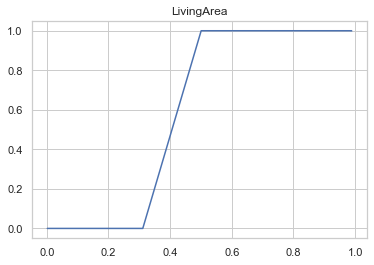

In [116]:
sns.lineplot(lr_probs[:,1],prediction4)
plt.title('LivingArea')
plt.show()


In [99]:
df7=df[['GarageArea','FullBath']]
df7.head()

,GarageArea,FullBath
0,548,2
1,460,2
2,608,2
3,642,1
4,836,2


In [100]:
bath_dummies1 = pd.get_dummies(df7.FullBath, prefix="FullBath")
df7 = pd.concat([df7,bath_dummies1],axis='columns')
df7.drop('FullBath',axis='columns',inplace=True)
df7.columns

Index(['GarageArea', 'FullBath_0', 'FullBath_1', 'FullBath_2', 'FullBath_3'], dtype='object')

In [101]:
data_train5, data_test5 = train_test_split(df7,train_size = 0.8,random_state=10)

x_train5=data_train5.drop(columns='FullBath_1',axis=1)
y_train5=data_train5['FullBath_1']
x_test5=data_test5.drop(columns='FullBath_1',axis=1)
y_test5=data_test5['FullBath_1']

reg1 = LogisticRegression()
reg1.fit(x_train5, y_train5)
prediction5 = reg1.predict(x_test5)
prediction5

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1], dtype=uint8)

In [119]:
lr_probs = reg1.predict_proba(pd.DataFrame(np.array(x_test5)))
ns_probs = [0 for _ in range(len(y_test5))]

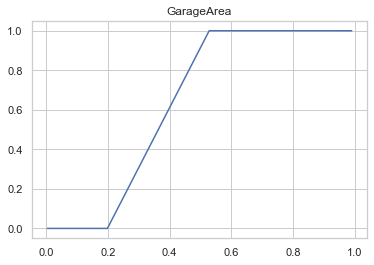

In [120]:
sns.lineplot(lr_probs[:,1],prediction5)
plt.title('GarageArea')
plt.show()

In [95]:
# TASK 2
LR_prob=reg1.predict_proba(pd.DataFrame(np.array(x_test5)))
df.loc[np.where(LR_prob[:,0]>0.9)]['GrLivArea']

1      1262
5      1362
6      1694
8      1774
10     1040
       ... 
282    1314
284    1575
288     900
289    1396
290    1919
Name: GrLivArea, Length: 153, dtype: int64

In [97]:
# TASK 3
from sklearn.metrics import confusion_matrix
c1=confusion_matrix(y_test4 , prediction4)
c1

array([[153,   3],
       [  0, 124]], dtype=int64)

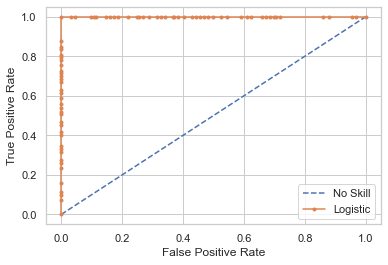

In [89]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_fpr, ns_tpr, _ = roc_curve(y_test4, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test4, lr_probs[:,1])

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

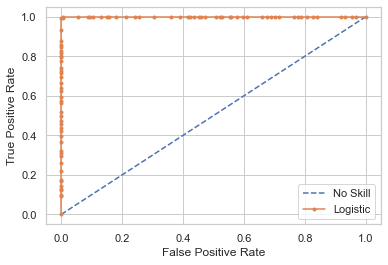

In [103]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_fpr, ns_tpr, _ = roc_curve(y_test5, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test5, lr_probs[:,1])

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

# PART 5

In [122]:
# TASK 1
df8 = df2[df['GarageCars']>0]
df8

,SalePrice,GrLivArea,LotArea,GarageArea,GarageCars,FullBath,YearBuilt,YrSold,AgeWhenSold
0,208500,1710,8450,548,2,2,2003,2008,5
1,181500,1262,9600,460,2,2,1976,2007,31
2,223500,1786,11250,608,2,2,2001,2008,7
3,140000,1717,9550,642,3,1,1915,2006,91
4,250000,2198,14260,836,3,2,2000,2008,8
...,...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,460,2,2,1999,2007,8
1456,210000,2073,13175,500,2,2,1978,2010,32
1457,266500,2340,9042,252,1,2,1941,2010,69
1458,142125,1078,9717,240,1,1,1950,2010,60


In [123]:
# TASK 2
df8 = df8[['YearBuilt','GrLivArea','GarageCars']]
df8.head()

,YearBuilt,GrLivArea,GarageCars
0,2003,1710,2
1,1976,1262,2
2,2001,1786,2
3,1915,1717,3
4,2000,2198,3


In [124]:
df_train5, df_test5 = train_test_split(df8,train_size = 0.8,random_state=2)

x_train5=df_train5.drop(columns='GarageCars',axis=1)
y_train5=df_train5['GarageCars']
x_test5=df_test5.drop(columns='GarageCars',axis=1)
y_test5=df_test5['GarageCars']

In [126]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train5, y_train5)
prediction6 = dtc.predict(x_test5)
prediction6

array([2, 2, 2, 2, 1, 2, 3, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2,
       3, 1, 3, 2, 2, 2, 3, 3, 1, 1, 3, 1, 2, 1, 2, 1, 2, 3, 2, 1, 1, 2,
       2, 3, 3, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 2, 2, 1, 1,
       1, 2, 1, 3, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 1, 3, 1, 3, 2, 2, 2, 2,
       2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 3, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 3, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 2, 1, 3, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 2,
       2, 1, 2, 1, 2, 3, 1, 2, 2, 2, 1, 2, 1, 1, 3, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 3, 2, 2, 1, 1, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 3, 1, 1, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 3],
      dtype=int64)

In [127]:
print('Score: ',dtc.score(x_test5,y_test5))

Score:  0.7083333333333334


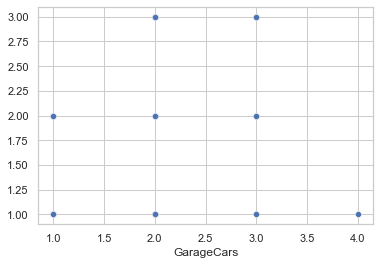

In [129]:
# TASK 3
sns.scatterplot(y_test5,prediction6)
plt.show()

In [130]:
for i in [2,4,5,6]:
    dtc = DecisionTreeClassifier(max_depth = i)
    dtc.fit(x_train5,y_train5)
    prediction6 = dtc.predict(x_test5)
    print('Score: ', round(dtc.score(x_test5,y_test5)*100,2))

Score:  67.42
Score:  69.7
Score:  70.08
Score:  68.56
